In [ ]:
import random
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


In [ ]:
class Point:
    def __init__(self, x = 0.0, y = 0.0):
      self.x = x
      self.y = y
    
    def distance(self, point):
      return ((self.x - point.x) ** 2 + (self.y - point.y) ** 2 ) ** 0.5
    
    def __getitem__(self, key):
        if key == 0:
          return self.x
        if key == 1:
          return self.y
        
        raise "Point Class: Out of Bound"

class Disk: 
    # Direction: 1 goes up, -1 goes down
    def __init__(self, rad, thk, sep):
      self.rad = rad
      self.thk = thk
      self.sep = sep
      # Assume starting point at bottom left
      self.centerl = Point(rad * 2 + 1.5 * thk, thk + rad)
      self.centeru = Point(thk + rad, sep + thk + rad)
    
    def genPoints(self, num):
      self.points = []
      self.mark = []

      xstart = 0
      xend = (self.thk + self.rad) * 3 - self.thk / 2
      ystart = 0
      yend = (self.thk + self.rad) * 2 + self.sep

      lowerXStart = self.thk * 0.5 + self.rad
      lowerXEnd = xend
      lowerYStart = 0
      lowerYEnd = self.centerl.y

      upperXStart = 0
      upperXEnd = (self.thk + self.rad) * 2
      upperYStart = self.rad + self.thk + self.sep
      upperYEnd = upperYStart + self.rad + self.thk

      rangeMax = self.rad + self.thk

      while len(self.points) < num:
        # Randomly generate points within the rect to ensure uniform, pick points satisfied the equation.
        cx = np.random.uniform(xstart, xend)
        cy = np.random.uniform(ystart, yend)
        if lowerXStart <= cx <= lowerXEnd and lowerYStart <= cy <= lowerYEnd:
          p = Point(cx, cy)
          if self.rad <= p.distance(self.centerl) <= rangeMax:
            self.points.append(Point(cx, cy))
            self.mark.append(-1)
        elif upperXStart <= cx <= upperXEnd and upperYStart <= cy <= upperYEnd:
          p = Point(cx, cy)
          if self.rad <= p.distance(self.centeru) <= rangeMax:
            self.points.append(Point(cx, cy))
            self.mark.append(1)

    def plotDot(self, axs):
      x = [p.x for p in self.points]
      y = [p.y for p in self.points]
      axs.scatter(x, y, c=['blue' if m == 1 else 'red' for m in self.mark])

# From homework 1
def run_pla(p, resy):
  start = np.array([0.0,0.0,0.0])
  times = 0

  check = False
  while (not check):
    check = True
    for i in range(len(resy)):
      x = np.array([1, p[i][0], p[i][1]])
      if np.dot(start, x) * resy[i] <= 0:
        check = False
        start += resy[i] * x
        times += 1

  return start, times

def linear_regression(x, res):
    X = [[1, p.x, p.y] for p in x]
    Y = res
    
    XT = np.transpose(X)
    XTX = np.dot(XT, X)
    XTX_inv = np.linalg.inv(XTX)
    XTX_invXT = np.dot(XTX_inv, XT)
    Wlin = np.dot(XTX_invXT, Y)
    
    return Wlin

def runExp(rad = 10.0, thk = 5.0, sep = 5.0, data_num = 2000):
  calcy = lambda x1, result : (- result[0] / result[2]) - (result[1] * x1 / result[2])

  fig, axs = plt.subplots()
  disk1 = Disk(rad, thk, sep)
  disk1.genPoints(data_num)
  print("{} Points generated".format(len(disk1.points)))
  disk1.plotDot(axs)

  # Pla
  result, times = run_pla(disk1.points, disk1.mark)
  print("Pla result: {}, updated {} times".format(result, times))

  # Linear regression
  Wlin = linear_regression(disk1.points, disk1.mark)
  print("Linear Regession result: {}".format(Wlin))

  # Line range, just make it longer than the max x
  l = 0
  h = 50
  axs.plot([l, h], [calcy(l, result), calcy(h, result)], color="black", label="PLA")
  axs.plot([l, h], [calcy(l, Wlin), calcy(h, Wlin)], color="green", label="Linear Regression")

  return (fig, axs), (result, times), Wlin, disk1

2000 Points generated
Pla result: [-1217.           -26.7260782    105.03580394], updated 4845 times
Linear Regession result: [-1.15950148 -0.00936171  0.0771953 ]


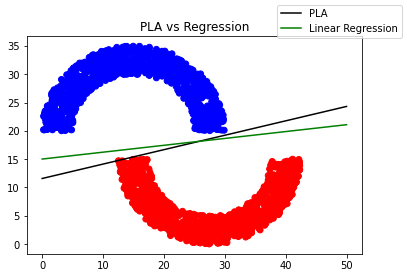

In [ ]:
# Question 3.1
(fig, axs), _, _, _ = runExp()
axs.set_title("PLA vs Regression")
fig.legend()

2000 Points generated
Pla result: [-3.07600000e+03 -6.34115166e-01  2.03201117e+02], updated 26304 times
Linear Regession result: [-1.05272463 -0.01447281  0.08984826]
2000 Points generated
Pla result: [-3499.            -6.03750677   239.38536716], updated 31161 times
Linear Regession result: [-1.08410531 -0.01298419  0.08979747]
2000 Points generated
Pla result: [-3019.            -8.21603082   208.36415377], updated 22461 times
Linear Regession result: [-1.04010218 -0.0141449   0.08751142]
2000 Points generated
Pla result: [-2305.            -8.2016306    161.17413124], updated 14673 times
Linear Regession result: [-1.11706074 -0.01143767  0.0886525 ]
2000 Points generated
Pla result: [-2635.           -9.5907493   183.8267609], updated 18001 times
Linear Regession result: [-1.08856677 -0.01260435  0.08725925]
2000 Points generated
Pla result: [-1672.            -6.42280122   115.32377107], updated 9076 times
Linear Regession result: [-1.01079763 -0.01581676  0.08605018]
2000 Points

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:106: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Pla result: [-904.          -22.28463255   78.53398425], updated 3406 times
Linear Regession result: [-1.14963547 -0.01038856  0.07985861]
2000 Points generated
Pla result: [-1236.           -21.27523849    99.86359029], updated 5020 times
Linear Regession result: [-1.13706649 -0.01062067  0.07934932]
2000 Points generated
Pla result: [-1142.           -23.35367532    92.1656621 ], updated 4452 times
Linear Regession result: [-1.19493892 -0.00854935  0.07970575]
2000 Points generated
Pla result: [-1170.           -32.81913404   107.89566122], updated 4584 times
Linear Regession result: [-1.10620205 -0.01140523  0.0769097 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


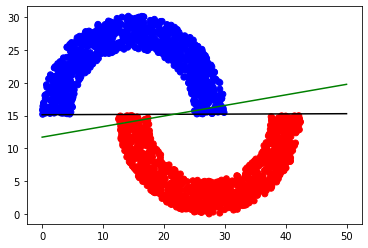

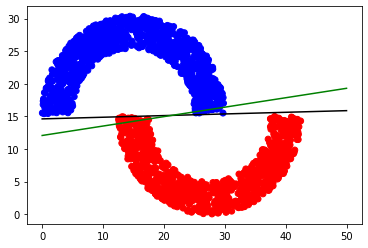

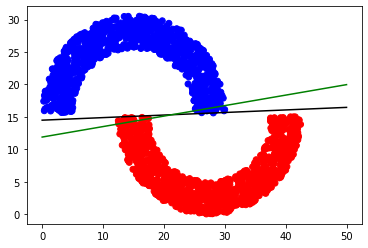

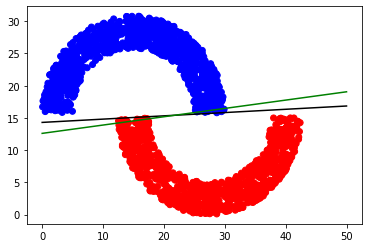

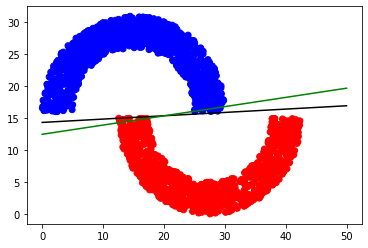

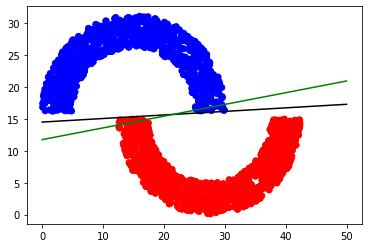

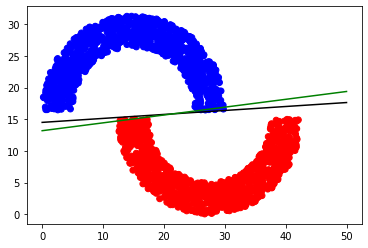

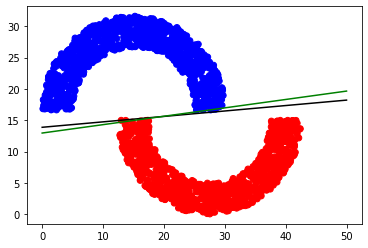

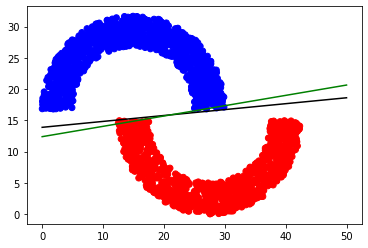

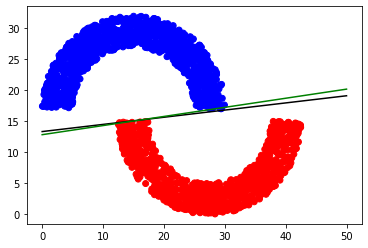

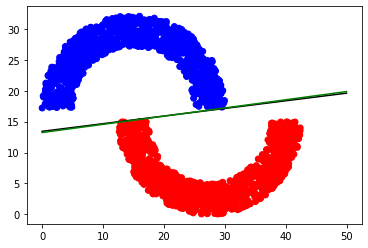

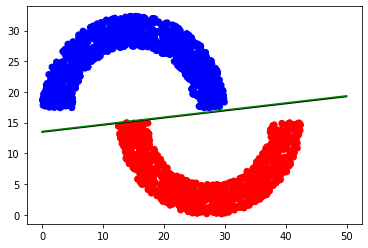

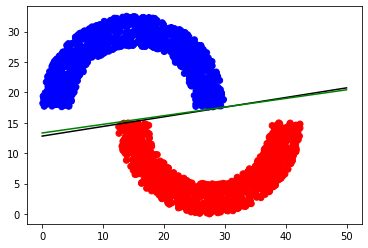

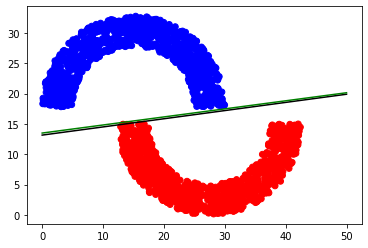

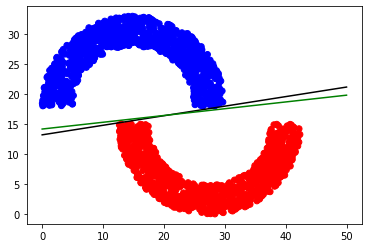

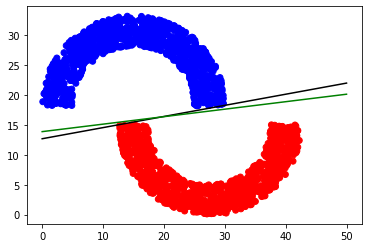

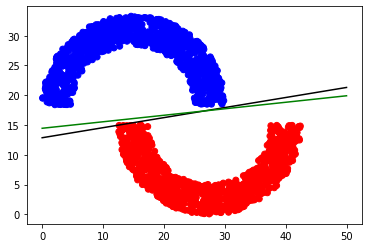

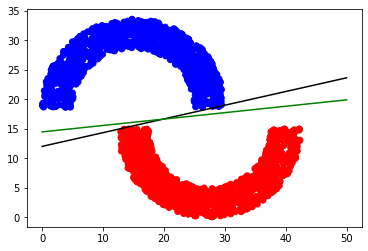

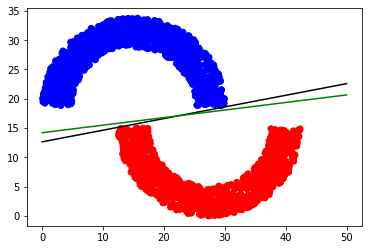

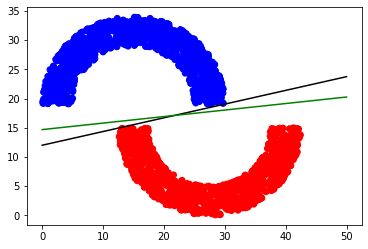

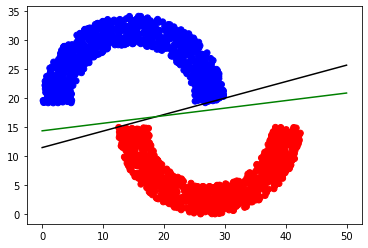

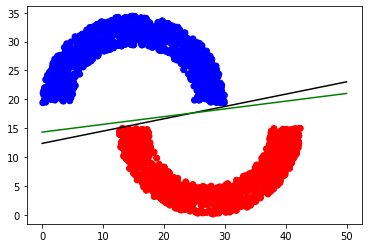

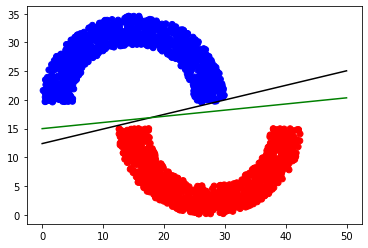

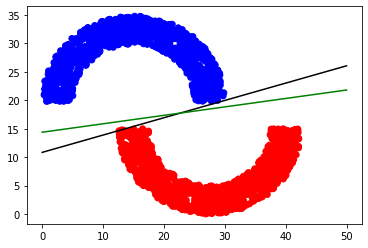

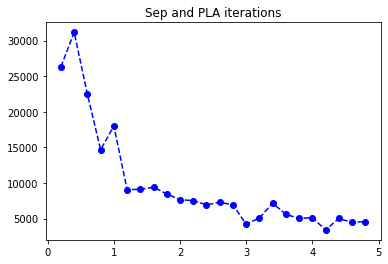

In [ ]:
# Question 3.2
sepTimes = np.arange(0.2, 5, 0.2)
PLAtimes = []
for i in sepTimes:
  _, (_, times), _, _ = runExp(sep=i)
  PLAtimes.append(times)

fig, axs = plt.subplots(1)
axs.plot(sepTimes, PLAtimes, linestyle='--', marker='o', color='b')
axs.set_title("Sep and PLA iterations")
fig.show()

In [ ]:
# finalize
pres = lambda result : "y = {}x + {}".format(
    result[1] / result[2], - result[0] / result[2]
  )
pres([-1217, -26.7260782, 105.03580394])

'y = -0.2544473141298261x + 11.586525302316833'

In [24]:
# Handwriting

def extractData(filename):
    data = []
    with open(filename) as f:
      for line in f:
        cols = line.split()
        if len(cols) < 256: # Bad data
          continue
        digit = int(float(cols[0]))
        if digit == 1 or digit == 5:
          data.append((digit, np.reshape([float(pixel) for pixel in cols[1:]], (-1, 16))))
    return data
    
trainData = extractData('/content/drive/MyDrive/handwriting/ZipDigits.train')
testData = extractData('/content/drive/MyDrive/handwriting/ZipDigits.test')

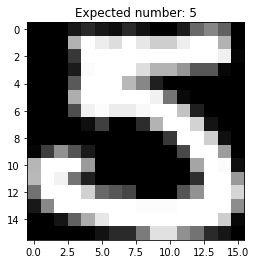

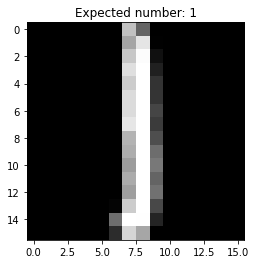

In [26]:
def getDigitPlot(data, num):
  plt.imshow(data, cmap='gray')
  plt.title("Expected number: {}".format(num))
  plt.show()

num1, img1 = trainData[0]
num2, img2 = trainData[1]
getDigitPlot(img1, num1)
getDigitPlot(img2, num2)

In [31]:
# Features
def symmetry(image):
    res = 0.0
          
    for i in range(8):
        for j in range(16):
            res += abs(image[i][j]-image[15-i][j])
    return res

def intensity(image):
    return np.sum(image)

print("Intensity: {}, Symmetry: {}, num: {}".format(intensity(img1), symmetry(img1), num1))
print("Intensity: {}, Symmetry: {}, num: {}".format(intensity(img2), symmetry(img2), num2))

Intensity: -28.604999999999997, Symmetry: 107.58100000000002, num: 5
Intensity: -193.002, Symmetry: 7.619999999999999, num: 1


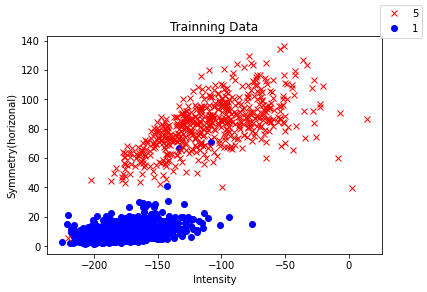

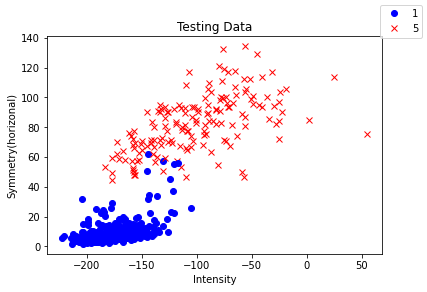

In [44]:
def runSep(data):    
    fig, axs = plt.subplots(1)

    for num, img in data:
      in_res = intensity(img)
      sym_res = symmetry(img)
      if num == 1:
        axs.plot(in_res, sym_res, 'bo')
      elif num == 5:
        axs.plot(in_res, sym_res, 'rx')
    
    axs.set_xlabel("Intensity")
    axs.set_ylabel("Symmetry(horizonal)")

    return fig, axs


fig_tr, axs_tr = runSep(trainData)
axs_tr.set_title("Trainning Data")
fig_tr.legend(labels=[5, 1])

fig_t, axs_t = runSep(testData)
axs_t.set_title("Testing Data")
fig_t.legend(labels=[1, 5])